# *Handwritten Digit Recognition*
---
## Exploratory Data Analysis

In [13]:
import sys
print(sys.executable)

/Users/saiganesh/miniconda3/envs/handwriting-recognition/bin/python


In [38]:
## Lets load the dataset first.

# From tensorflow
from tensorflow.keras.datasets import mnist

# this will auto-download (first time) add cache the files for you:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


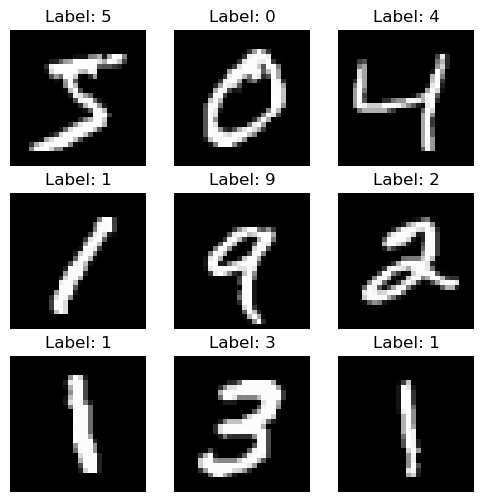

In [39]:
# we want to take a look at the data first. 
# View some raw examples

import matplotlib.pyplot as plt
# show the first 9 digits in the training set
fig, axes = plt.subplots(3, 3, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()


In [40]:
# Check class balance:
# By class we mean labels: 0 through 9
import numpy as np
counts = np.bincount(y_train)
for digit, cnt in enumerate(counts):
    print(f"{digit}: {cnt}")

0: 5923
1: 6742
2: 5958
3: 6131
4: 5842
5: 5421
6: 5918
7: 6265
8: 5851
9: 5949


In [41]:
# inspect pixel statistics
print("Pixel min/max:", X_train.min(), X_train.max())
print("Mean/Std:", X_train.mean(), X_train.std())

Pixel min/max: 0 255
Mean/Std: 33.318421449829934 78.56748998339798


In [42]:
(X_train_copy, y_train_copy), (X_test_copy, y_test_copy) = mnist.load_data()

# 2) Inspect dtype and min/max to confirm it really is 0–255
print("dtype:", X_train_copy.dtype)
print("min, max:", X_train_copy.min(), X_train_copy.max())

# 3) Flatten into vectors but don’t divide by 255
raw_flat = X_train_copy.reshape(-1, 28*28)

# 4) Print the *first* 20 pixels of the first 3 images, as ints
for i in range(3):
    vals = raw_flat[i][:300].tolist()      # turn into a Python list so printing is unambiguous
    print(f"Sample {i}, label={y_train_copy[i]} → {vals}")

dtype: uint8
min, max: 0 255
Sample 0, label=5 → [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
from sklearn.model_selection import train_test_split

# Flatten
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test  = X_test.reshape(-1,  28*28) / 255.0

# split training into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Shapes →",
      "Train:", X_train.shape, y_train.shape,
      "Val:",   X_val.shape,   y_val.shape,
      "Test:",  X_test.shape,  y_test.shape)

Shapes → Train: (38400, 784) (38400,) Val: (9600, 784) (9600,) Test: (10000, 784) (10000,)


In [46]:
# Now just print out the first 300 pixel values of X_train's first 3 samples after dividing each by 255
for i in range(3):
    vals = X_train[i][:300].tolist()      # turn into a Python list so printing is unambiguous
    print(f"Sample {i}, label={y_train[i]} → {vals}")
# We shoould be able to see the same lists as above, but this time, the number being between 0 and 1.

Sample 0, label=5 → [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004921184159938485, 0.0010918877354863514, 0.0015993848519800077, 0.002

In [49]:
# Now for each of the classes, 0-9, we need to do one-hot encoding. 
'''
if we have 
apple -> 0
banana -> 1
grape -> 2

we can change it to 
apple -> [1, 0, 0]
banana -> [0, 1, 0]
grape -> [0, 0, 1]

this is one-hot encoding
'''
# This is used for comparing what our model outputs, [0.01, 0.3, 0.2, ...., 0.8] with [0, 0, 0, ..., 1] (10 vs 10)
# One-hot = a way to tell the model exactly which class is correct by placing a single 1 in the slot of the true class and zeros elsewhere.
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
Y_train = enc.fit_transform(y_train.reshape(-1, 1))
Y_val = enc.transform(y_val.reshape(-1, 1))
Y_test = enc.transform(y_test.reshape(-1, 1))

for i in range(5):
    print(f"Y_train = {Y_train[i]}")


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'